# Learning a Linear Model Between Celsius and Fahrenheit

In this notebook be fit two parameters to a collection of temperater data. A scaler parameter $w$ and a basis parameter $b$. (i.e. we assume our (x,y) data matches an equation of the form $y= wx + b$ and we wish to determine these parameter values.)

We use gradient descent to determine these parameters by applying an L2 loss function to what our current model predicts and what our actual data is.


In [6]:
%matplotlib inline

import torch as T
from matplotlib import pyplot as plt

In [8]:
# Our data
# temperatures in unknown units
temp_x = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
# temperatures in celsius. 
temp_y = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
assert(len(temp_x) == len(temp_y))

# Create tensors for data
t_x = T.tensor(temp_x)
t_y = T.tensor(temp_y)

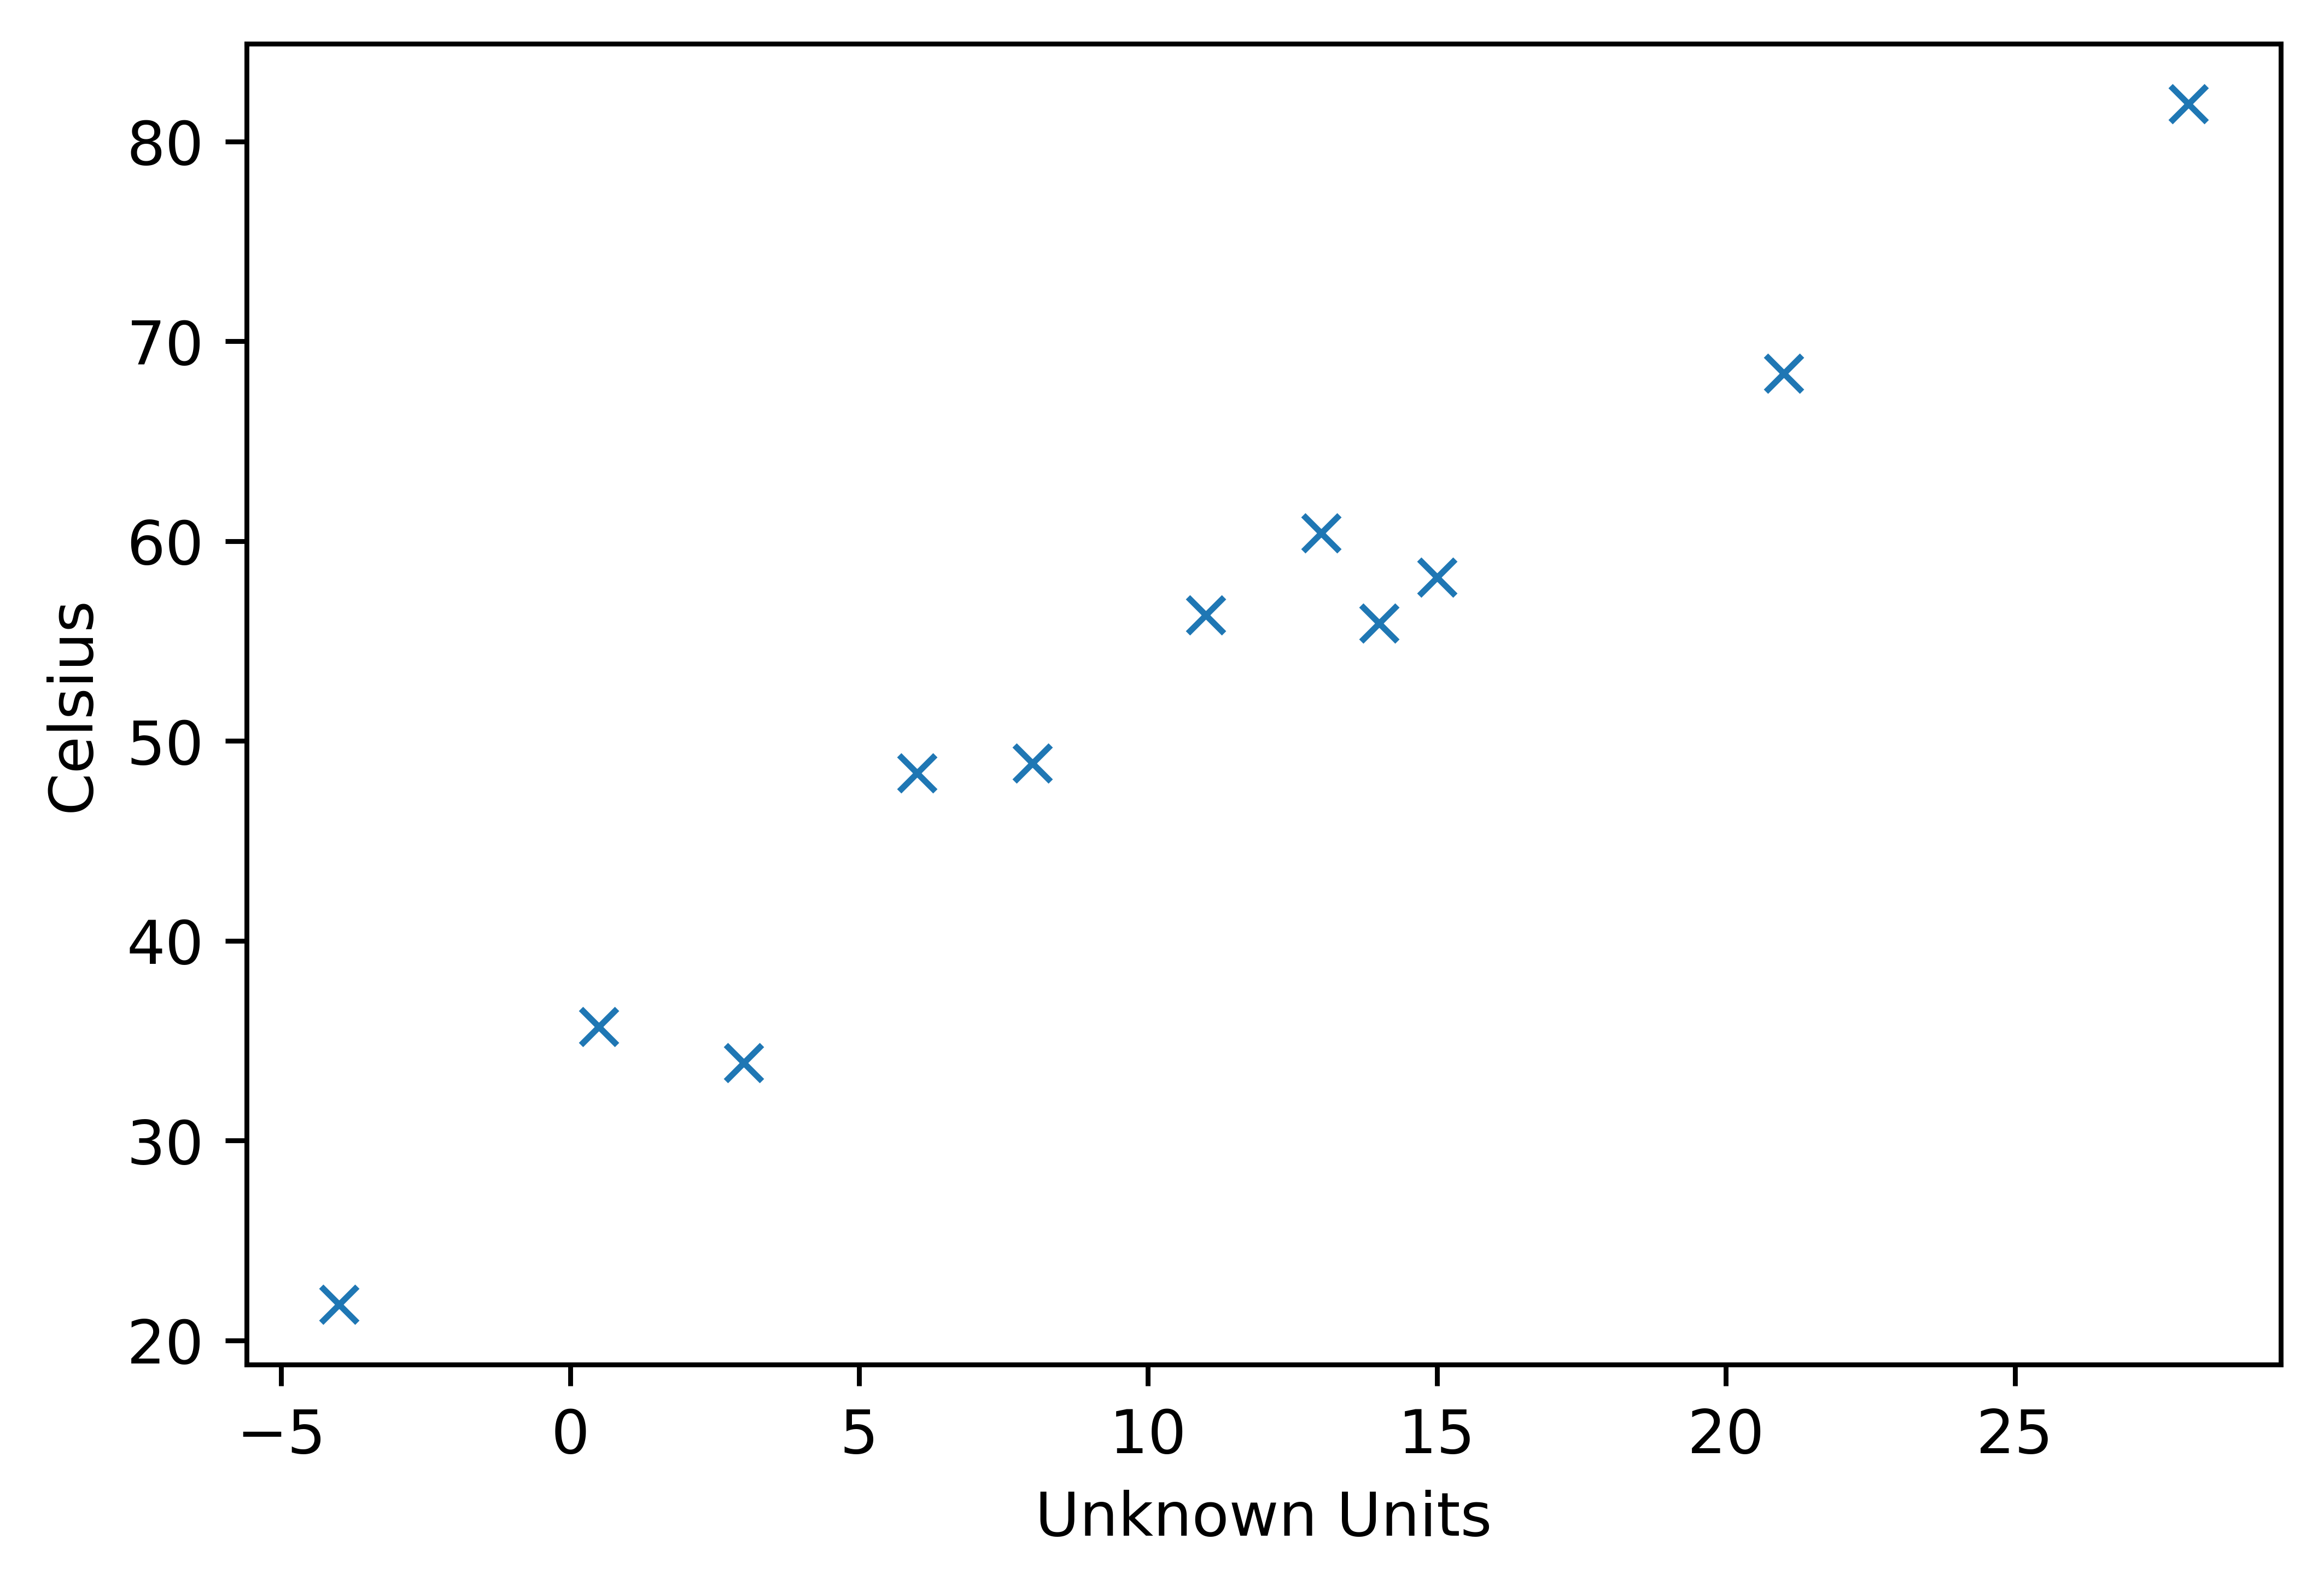

In [11]:
# Plot data to see if our linear model is a "good idea"
fig = plt.figure(dpi=800)
plt.xlabel("Unknown Units")
plt.ylabel("Celsius")
plt.plot(t_x.numpy(), t_y.numpy(), 'x')

## Define model, loss function and gradient of loss function. 

Below define our model, loss (error) function, gradient of loss (error) function, and the partial derivatives of our loss function. Note the use of broadcasting by the tensor objects.  

### Model (Linear)
$ y = w*x + b$

### Loss function
$ \frac{1}{2}(y_{pred} - y_{label})^2$  
$ = \frac{1}{2}((w*x + b) - y_{label})^2$


### Derivative of Loss
$$


In [14]:
#   y = w*x + b
def model(x, w, b):
    return w*x + b

# Over all data points, average 1/2(y_pred - y_true)^2
def loss_fn(y_pred, y_label):
    sq_error = (y_pred - y_label)**2
    return 0.5 * sq_error.mean()

def dloss_fn(y_pred, y_label):
    dsq = (y_pred - y_label) / y_pred.size(0)